<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/12_22_%EB%AF%B8%EC%A0%81%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pylab as plt

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import matplotlib as mpl

## 미분

최적화를 하기 위해서는 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지를 정량적으로 알아야 하며 이러한 과정이 미분이다.

함수의 그래프상에 있는 한 점을 줌심으로 그래프를 무한히 확대해 보면 그래프의 모양이 직선에 가까워지는데 이때의 기울기를 미분이라고 한다. 이 직선은 같은 점을 기준으로 그린 그래프의 접선과 같다.

신명망에서 미분의 필요성 : https://gggggeun.tistory.com/120           https://gggggeun.tistory.com/121

미분 개념 : https://www.youtube.com/watch?v=kMZ3RJEaLE4


In [3]:
# 한글 깨짐 해결방법 : 실행 후 Restart runtime 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


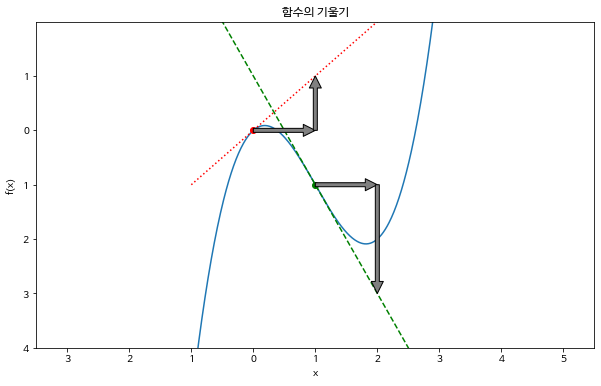

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


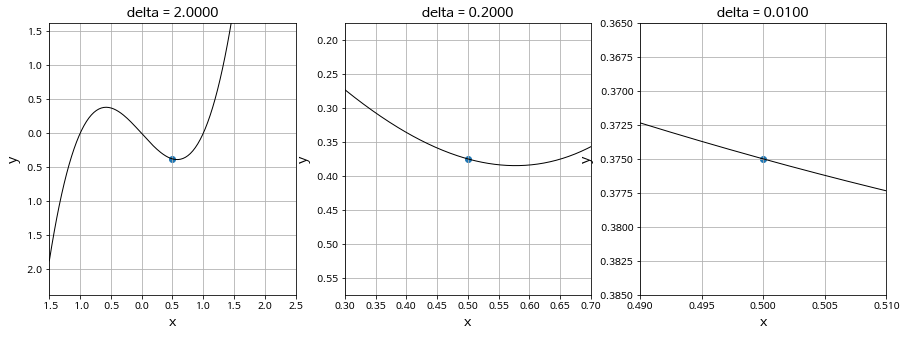

In [6]:
def f(x):
    return(x**3 - x)

plt.figure(figsize=(15, 5))
delta = [2.0, 0.2, 0.01]

x = np.linspace(0.5-delta[0], 0.5+delta[0], 200)
y = f(x)

plt.subplot(131)

plt.ylim(-3.0/8.0-delta[0], -3.0/8.0+delta[0])
plt.xlim(0.5-delta[0], 0.5+delta[0])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[0], fontsize=14)


x = np.linspace(0.5-delta[1], 0.5+delta[1], 200)
y = f(x)

plt.subplot(132)

plt.ylim(-3.0/8.0-delta[1], -3.0/8.0+delta[1])
plt.xlim(0.5-delta[1], 0.5+delta[1])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[1], fontsize=14)

x = np.linspace(0.5-delta[2], 0.5+delta[2], 200)
y = f(x)

plt.subplot(133)
plt.ylim(-3.0/8.0-delta[2], -3.0/8.0+delta[2])
plt.xlim(0.5-delta[2], 0.5+delta[2])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[2], fontsize=14)

plt.show()


### 접선의 방정식

- 함수 f(x)에서 x의 값을 dx만큼 변화시켰을 때 f(x)의 변화량 (f(x+dx)-f(x))는 f'(x)dx와 같다.
- 미분 : y=f(x)라는 그래프상의 점(a,f(a))가 있을 때 그 점에서 그은 접선의 기울기는 f'(a)이며 a에서의 순간 변화율을 의미
- 적분 : 도함수 f'(x)의 하방 면적은 원 함수 f(x)의 y의 값이다. ex) f(x) = $x^2$


In [7]:
import numpy as np
x = np.linspace(-4, 4, 100)
x.min()

-4.0

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


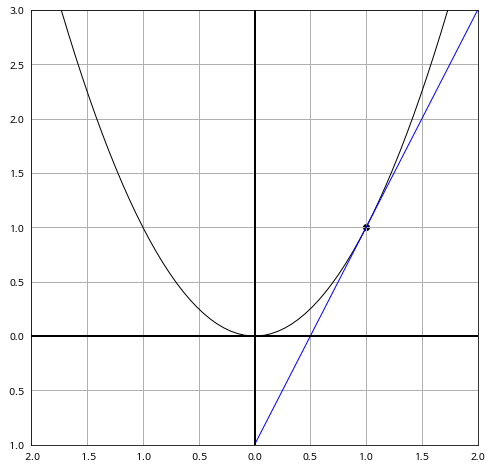

In [8]:
def f(x):
    return(x**2)
def g(x):
    return(2*x -1)

# x가 1일때의 접선의 방정식 2x -1, 기울기는 1
x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(8,8))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()

In [9]:
# scipy.misc 패키지의 derovative() 사용하여 기울기 계산
from scipy.misc import derivative

print(derivative(f, 0, dx=1e-6))   ## dx는 x의 증가량을 뜻한다
print(derivative(f, 1, dx=1e-6))

0.0
2.000000000002


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


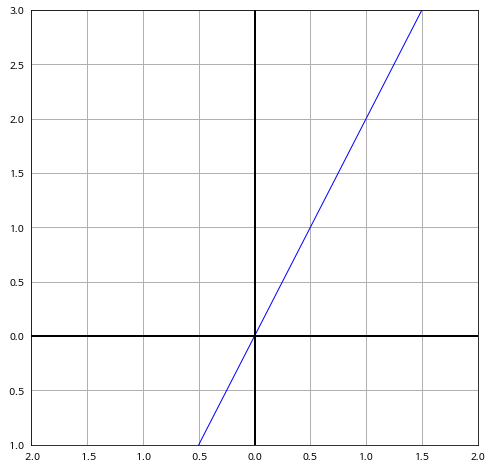

In [12]:
def g(x):
  return(2*x)

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(8,8))
plt.plot(x, g(x), 'b-', lw=1, c = 'b')
plt.plot([x.min(), x.max()], [0,0], lw=2, c='k')
plt.plot([0,0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
plt.tick_params(color='white')
plt.show()

In [13]:
!pip install --ipgrade pip --user


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --ipgrade


In [14]:
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import sympy

sympy.init_printing(use_latex='mathjax')

In [18]:
x,y = sympy.symbols('x y')
f = x ** 2 + 4*x*y + 4*y **2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

y를 그냥 상수 취급 해버림

In [19]:
# diff() 함수로 미분, 변수, 상수를 구분하기 위하여 편미분인 것처럼 입력 변수 지정
sympy.diff(f, x)

2⋅x + 4⋅y

x를 변수로 취급하고 나머지는 상수 취급

In [20]:
sympy.diff(f, y)

4⋅x + 8⋅y

## 적분
- 적분은 미분과 반대되는 개념. 부정적분과 정적분이 있다.
 - 부정적분은 정확하게 미분과 반대되는 개념. 즉 반 미분이다. 어떤 함수를 미분하여 나온 결과인 도함수라고 가정하고 이 도함수 f(x)에 대한 미분되기 전의 원래의 함수를 찾는 과정 또는 그 결과를 의미
 - 정적분은 독립변수 x가 어떤 구간 [a,b] 사이일 때 그 구간에서 함수 f(x)의 값과 수평선(x축)이 이루는 면적을 구하는 행위 혹은 그 값을 의미
 
적분의 개념 : https://www.youtube.com/watch?v=kV2j3S5qBm4

미분과 적분의 관계 : https://www.youtube.com/watch?v=xAAAvj7bmKQ
